In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv


In [3]:
import re #regex applies a regular expression to a string and returns the matching substrings. 
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk 
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import BlanklineTokenizer
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
import scikitplot as skplt
from nltk.tokenize import word_tokenize
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from multiprocessing import Pool

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# train, test
train_data = pd.read_csv('../input/nlp-getting-started/train.csv')
test_data = pd.read_csv('../input/nlp-getting-started/test.csv')

In [5]:
train_data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


Text(0, 0.5, 'samples')

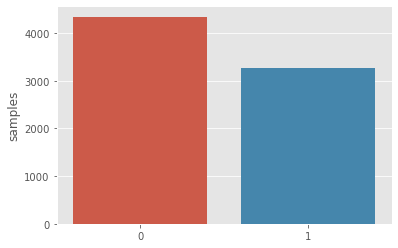

In [7]:
x = train_data.target.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('samples')

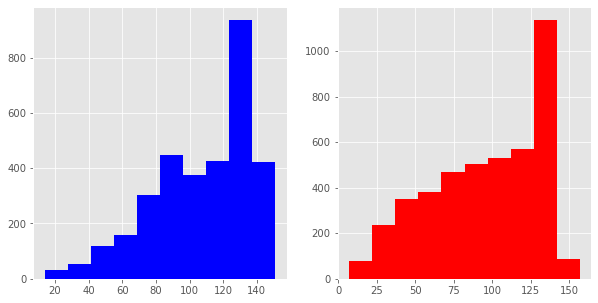

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
tweet_len = train_data[train_data['target'] ==1]['text'].str.len()
ax1.hist(tweet_len, color='blue')

tweet_len = train_data[train_data['target'] ==0]['text'].str.len()
ax2.hist(tweet_len, color='red')

plt.show()

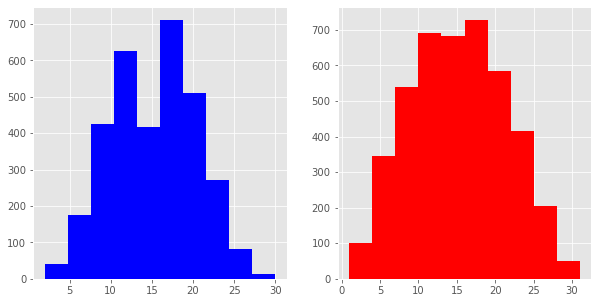

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
tweet_len = train_data[train_data['target'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='blue')

tweet_len = train_data[train_data['target'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len, color='red')

plt.show()


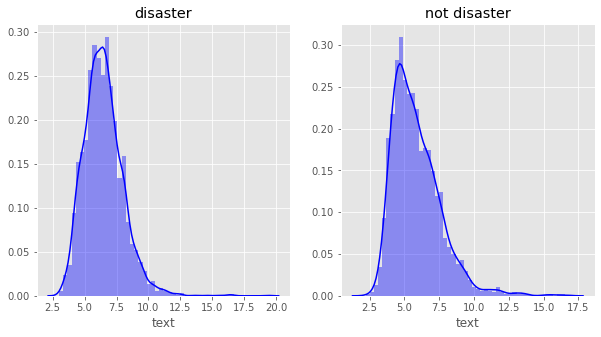

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
word = train_data[train_data['target'] == 1]['text'].str.split().map(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color='blue')
ax1.set_title('disaster')

word = train_data[train_data['target'] == 0]['text'].str.split().map(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax2, color='blue')
ax2.set_title('not disaster')

plt.show()


In [13]:
corpus = []

for x in train_data['text'].str.split():
    for i in x:
        corpus.append(i)

In [14]:
dic = defaultdict(int)

for word in corpus:
    if word not in stop:
        dic[word] += 1
        
top30 = sorted(dic.items(), key = lambda x: x[1], reverse=True)[:30
                                                               ]

<BarContainer object of 30 artists>

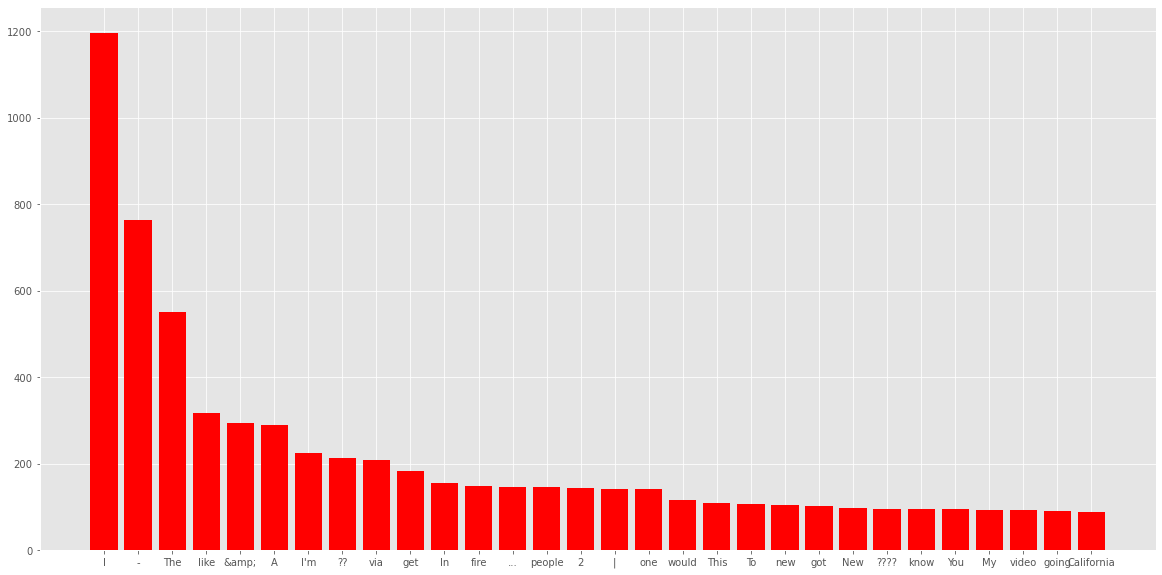

In [16]:
x,y = zip(*top30)
plt.rcParams['figure.figsize'] = (20,10)
plt.bar(x,y, color='red')

<BarContainer object of 30 artists>

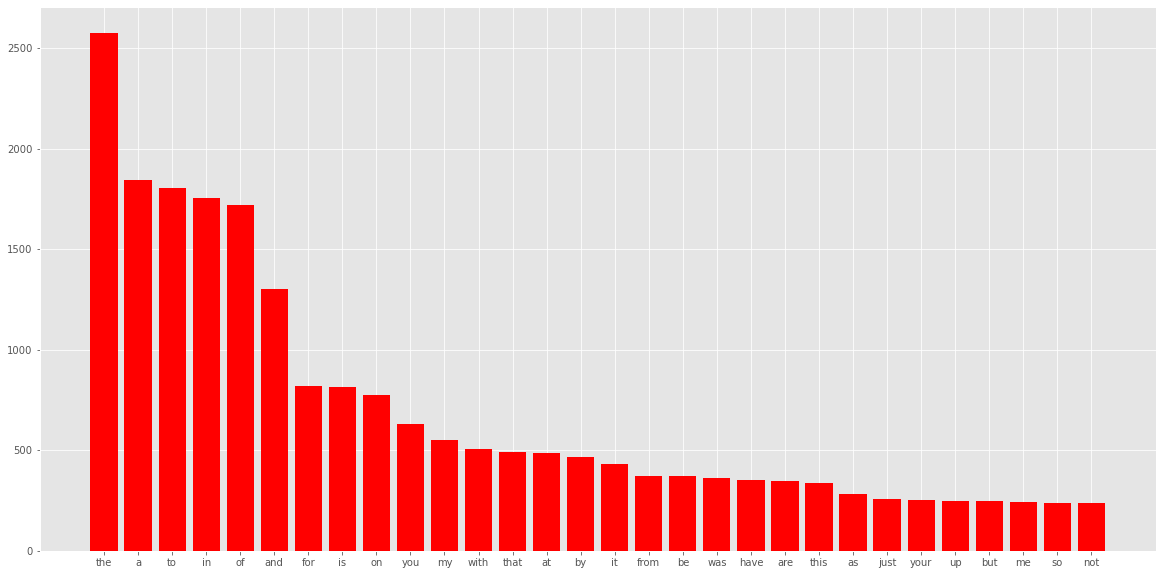

In [18]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
dic = defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word] += 1
        
top30 = sorted(dic.items(), key = lambda x: x[1], reverse=True)[:30]
x,y = zip(*top30)
plt.rcParams['figure.figsize'] = (20,10)
plt.bar(x,y, color='red')

<BarContainer object of 23 artists>

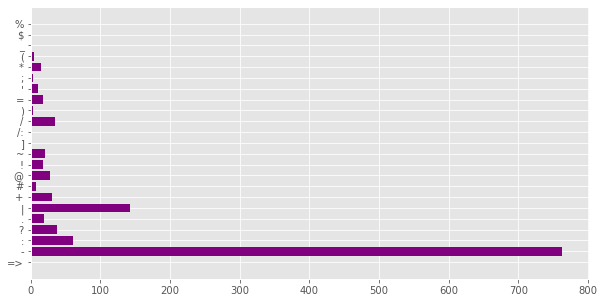

In [19]:
plt.figure(figsize=(10, 5))
import string
dic = defaultdict(int)
special = string.punctuation

for i in (corpus):
    if i in special:
        dic[i] += 1
        
x,y = zip(*dic.items())
plt.barh(x,y, color='purple')
        

In [20]:
from collections import Counter

words = train_data[train_data.target==0].text.apply(lambda x: [word.lower() for word in x.split()])
h_words = Counter()

for txt in words:
    h_words.update(txt)
    
print(h_words.most_common(30))

[('the', 1877), ('a', 1238), ('to', 1181), ('i', 1052), ('and', 911), ('of', 895), ('in', 805), ('you', 625), ('is', 586), ('my', 541), ('for', 486), ('on', 424), ('with', 374), ('-', 374), ('that', 357), ('it', 341), ('this', 286), ('be', 284), ('like', 250), ('have', 240), ('by', 240), ('so', 235), ('are', 231), ('at', 229), ('just', 229), ('your', 225), ('me', 221), ('was', 216), ('but', 216), ('not', 198)]


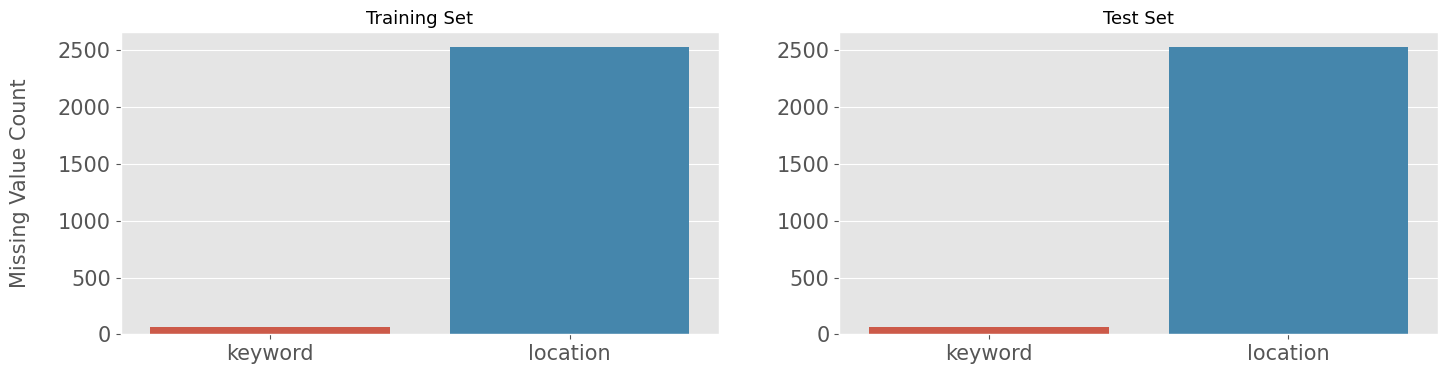

In [21]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17,4), dpi=100)

sns.barplot(x=train_data[missing_cols].isnull().sum().index, y=train_data[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=train_data[missing_cols].isnull().sum().index, y=train_data[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

for df in [train_data, test_data]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')


In [24]:
print(f'Number of unique value in keyword = {train_data["keyword"].nunique()} (Training) - {test_data["keyword"].nunique()}(Test)')

Number of unique value in keyword = 222 (Training) - 222(Test)


In [25]:
print(f'Number of unique value in location = {train_data["location"].nunique()} (Training) - {test_data["location"].nunique()}(Test)')

Number of unique value in location = 3342 (Training) - 1603(Test)


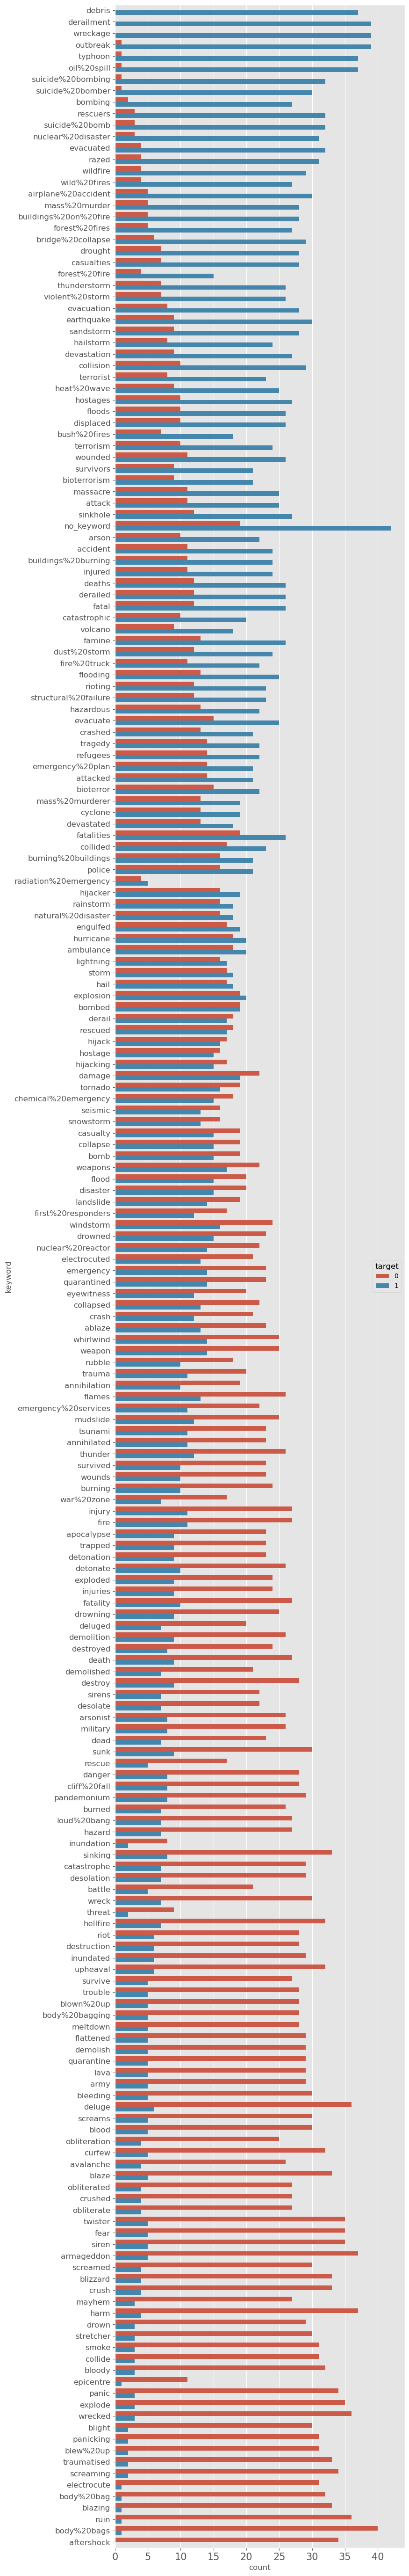

In [29]:
train_data['target_mean'] = train_data.groupby('keyword')['target'].transform('mean')
fig = plt.figure(figsize=(8,72), dpi=100)

sns.countplot(y=train_data.sort_values(by='target_mean', ascending=False)['keyword'],
             hue=train_data.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.show()


In [35]:
def clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    
    # 숫자 제거
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: re.sub(r"\d+", "", x))
    
    # 링크 제거
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", "", x))
    
    # 태그 제거 
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: re.sub(r"<.*?>", "", x))
    
    # 이모지 제거
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: re.sub(r"["u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF" 
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", "", x))

    return df

In [36]:
cleaned_data = clean_text(train_data, 'text', 'text_clean')
test_cleaned_data = clean_text(test_data, 'text', 'text_clean')
cleaned_data.head()

,id,keyword,location,text,target,target_mean,text_clean
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,0.688525,our deeds are the reason of this #earthquake m...
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,0.688525,forest fire near la ronge sask. canada
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,0.688525,all residents asked to 'shelter in place' are ...
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,0.688525,", people receive #wildfires evacuation orders ..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,0.688525,just got sent this photo from ruby #alaska as ...


In [37]:
cleaned_data.drop(columns=['target_mean'], inplace=True)

In [38]:
cleaned_data.head()

,id,keyword,location,text,target,text_clean
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


In [42]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
cleaned_data['text_clean'] = cleaned_data['text_clean'] \
            .apply(lambda x: \
            ' '.join([word for word in x.split() if word not in (stop)]))

In [43]:
cleaned_data.head()

,id,keyword,location,text,target,text_clean
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...


In [44]:
from nltk.tokenize import sent_tokenize, word_tokenize
cleaned_data['text_tokens'] = cleaned_data['text_clean'].apply(lambda x: word_tokenize(x))

cleaned_data.head()

,id,keyword,location,text,target,text_clean,text_tokens
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for..."
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]"
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie..."
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ..."


In [46]:
from nltk.stem import PorterStemmer

def word_stemmer(txt):
    stem_txt = [PorterStemmer().stem(i) for i in txt]
    return stem_txt

cleaned_data['text_clean_tokens'] = cleaned_data['text_tokens'].apply(lambda x: word_stemmer(x))
cleaned_data.head()

,id,keyword,location,text,target,text_clean,text_tokens,text_clean_tokens
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for...","[deed, reason, #, earthquak, may, allah, forgi..."
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, rong, sask, ., canada]"
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie...","[resid, ask, 'shelter, place, ', notifi, offic..."
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,...","[,, peopl, receiv, #, wildfir, evacu, order, c..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ...","[got, sent, photo, rubi, #, alaska, smoke, #, ..."


In [48]:
from nltk.stem import WordNetLemmatizer

def word_lemmatizer(txt):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in txt]
    return lem_text

cleaned_data['text_clean_tokens'] = cleaned_data['text_tokens'].apply(lambda x: word_lemmatizer(x))
cleaned_data.head()

,id,keyword,location,text,target,text_clean,text_tokens,text_clean_tokens
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for...","[deed, reason, #, earthquake, may, allah, forg..."
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, ronge, sask, ., canada]"
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie...","[resident, asked, 'shelter, place, ', notified..."
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,...","[,, people, receive, #, wildfire, evacuation, ..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ...","[got, sent, photo, ruby, #, alaska, smoke, #, ..."


In [52]:
# text_clean train_test_split
x_train, x_test, y_train, y_test = train_test_split(cleaned_data['text_clean'],
                                                   cleaned_data['target'],
                                                    test_size=0.2
                                                   )

In [53]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6090,) (1523,) (6090,) (1523,)


In [56]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,1))
vectorized = vectorizer.fit_transform(x_train)

pd.DataFrame(vectorized.toarray(), 
             index=['sentence' + str(i) for i in range(1, 1+len(x_train))],
             columns=vectorizer.get_feature_names())

,__,__srajapakse__,_animaladvocate,_ashj,_asianshawtyy,_bookofdaniel,_charleyisqueen,_chelsdelong,_dangdaddy,_dangerousbeans,...,ûïyou,ûò,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence,ûótech,ûówe
sentence1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\b[a-zA-Z]{3,}\b',ngram_range=(1,1))

In [58]:
vectorized = vectorizer.fit_transform(x_train)

In [59]:
pd.DataFrame(vectorized.toarray(), 
             index=['sentence' + str(i) for i in range(1, 1+len(x_train))],
             columns=vectorizer.get_feature_names())

,aaaaaaallll,aaaaaand,aaarrrgghhh,aal,aan,aannnnd,aar,aaronthefm,aashiqui,aba,...,zoom,zotar,zouma,zourryart,zrnf,zss,zumiez,zurich,zxathetis,zzzz
sentence1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
vectorizer = CountVectorizer(analyzer='word',
                              token_pattern=r'\b[a-zA-Z]{3,}\b',
                             ngram_range=(2,2),
                            min_df=2)
vectorized = vectorizer.fit_transform(x_train)

pd.DataFrame(vectorized.toarray(), 
             index=['sentence' + str(i) for i in range(1, 1+len(x_train))],
             columns=vectorizer.get_feature_names())

,aba woman,abandoned aircraft,abbswinston zionist,abc news,abc online,abcnews obama,abe government,ablaze amp,ablaze california,abomination maketh,...,youtube playlist,youtube video,yrs ago,yyc yycstorm,yycstorm abstorm,zionist terrorist,zombie apocalypse,zone coming,zouma flattened,zss sws
sentence1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# tf idf : document의 유사도 측정 

In [65]:
#tf idf transfomer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [66]:
vectorizer = CountVectorizer(analyzer='word',
                              token_pattern=r'\b[a-zA-Z]{3,}\b',
                             ngram_range=(1,1))

In [70]:
count_vectorized = vectorizer.fit_transform(x_train)
tfidf = TfidfTransformer(smooth_idf=True, use_idf=True)
train_features = tfidf.fit_transform(count_vectorized).toarray()

pd.DataFrame(train_features, index=['sentence' + str(i) for i in range(1, 1+len(x_train))],
                columns=vectorizer.get_feature_names()
            )

,aaaaaaallll,aaaaaand,aaarrrgghhh,aal,aan,aannnnd,aar,aaronthefm,aashiqui,aba,...,zoom,zotar,zouma,zourryart,zrnf,zss,zumiez,zurich,zxathetis,zzzz
sentence1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence6086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence6087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence6088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence6089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
tfidf = TfidfVectorizer(encoding='utf-8', ngram_range=(1,1),
                        max_features=5000, norm='l2', sublinear_tf=True)

In [72]:
train_features = tfidf.fit_transform(x_train).toarray()

In [73]:
print(train_features[1])
print(train_features.shape)

[0. 0. 0. ... 0. 0. 0.]
(6090, 5000)


In [74]:
dic_vocab = tfidf.vocabulary_

In [75]:
dic_vocab['forest']

1538

In [76]:
test_features = tfidf.transform(x_test).toarray()
print(test_features.shape)

(1523, 5000)


In [77]:
train_labels = y_train
test_labels = y_test

In [79]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [80]:
classifier = MultinomialNB()

In [81]:
classifier.fit(train_features, train_labels)

MultinomialNB()

In [86]:
predictions = classifier.predict(test_features)

In [87]:
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [90]:
train_acc = accuracy_score(train_labels, classifier.predict(train_features))
train_acc

0.8658456486042693

In [91]:
test_acc = accuracy_score(test_labels, predictions)
test_acc


0.7984241628365069

In [92]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       863
           1       0.83      0.67      0.74       660

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



In [94]:
test_vectorizer = tfidf.transform(test_cleaned_data['text_clean']).toarray()

In [95]:
preds = classifier.predict(test_vectorizer)

In [96]:
submission_df = pd.DataFrame()

In [97]:
submission_df['id'] = test_cleaned_data['id']
submission_df['target'] = preds

In [98]:
submission_df.to_csv('result.csv', index=False)

NameError: name 'submission' is not defined